In [1]:
# Step 1: Install and Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
df = pd.read_csv("/content/WA_Fn-UseC_-HR-Employee-Attrition.csv")
print(f"Dataset loaded successfully! Shape: {df.shape}")

Dataset loaded successfully! Shape: (1470, 35)


In [3]:
# Basic info
print("\nDataset Info:")
print(df.info())

print("\nFirst few rows:")
print(df.head())

print("\nBasic Statistics:")
print(df.describe())

print("\nMissing Values:")
print(df.isnull().sum())

print("\nAttrition Distribution:")
print(df['Attrition'].value_counts())
print(f"\nAttrition Rate: {(df['Attrition'].value_counts()['Yes'] / len(df) * 100):.2f}%")



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel 

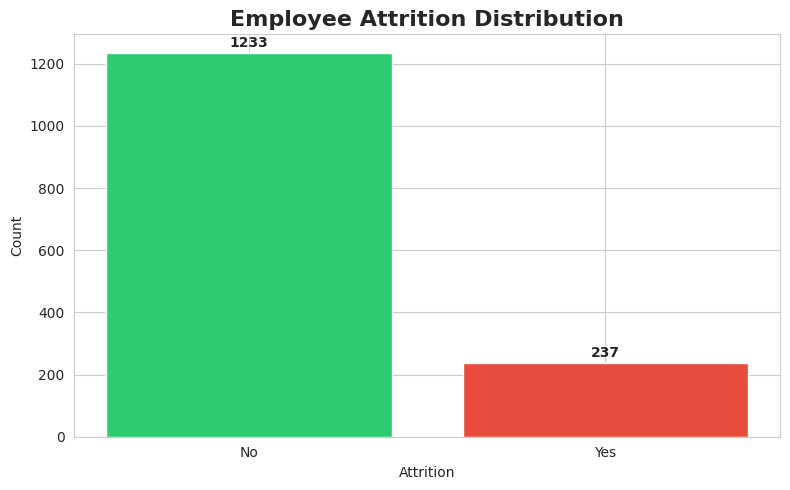

In [4]:
# 4.1: Attrition Distribution
plt.figure(figsize=(8, 5))
attrition_counts = df['Attrition'].value_counts()
plt.bar(attrition_counts.index, attrition_counts.values, color=['#2ecc71', '#e74c3c'])
plt.title('Employee Attrition Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Attrition')
plt.ylabel('Count')
for i, v in enumerate(attrition_counts.values):
    plt.text(i, v + 20, str(v), ha='center', fontweight='bold')
plt.tight_layout()
plt.show()

<Figure size 1000x500 with 0 Axes>

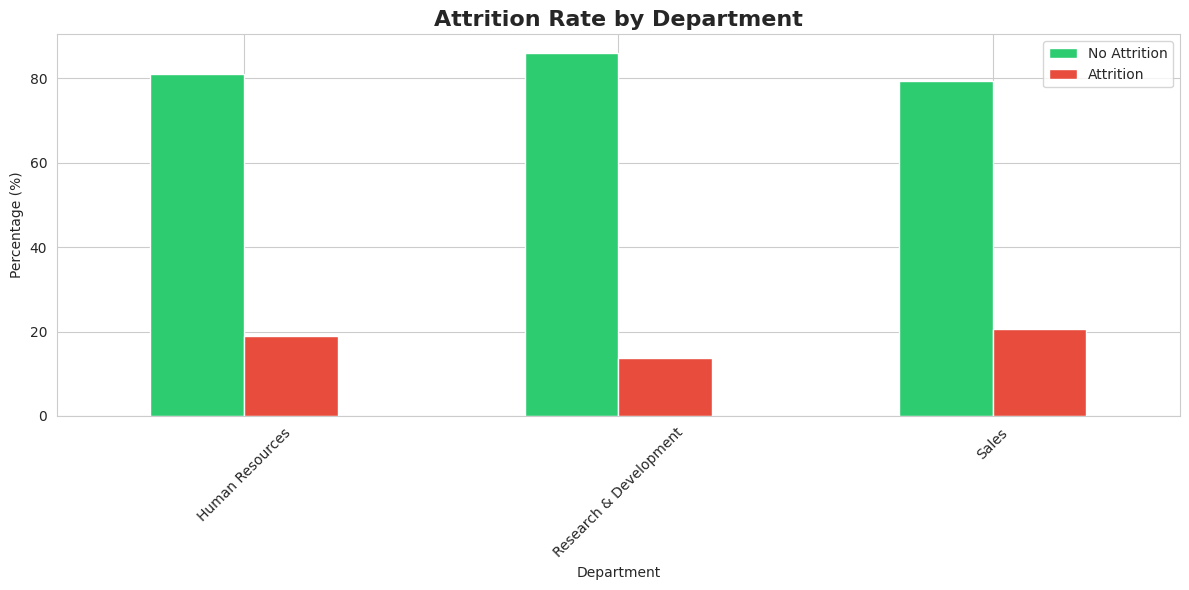

In [5]:
# 4.2: Attrition by Department (if exists)
if 'Department' in df.columns:
    plt.figure(figsize=(10, 5))
    dept_attrition = pd.crosstab(df['Department'], df['Attrition'], normalize='index') * 100
    dept_attrition.plot(kind='bar', stacked=False, color=['#2ecc71', '#e74c3c'])
    plt.title('Attrition Rate by Department', fontsize=16, fontweight='bold')
    plt.xlabel('Department')
    plt.ylabel('Percentage (%)')
    plt.legend(['No Attrition', 'Attrition'])
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

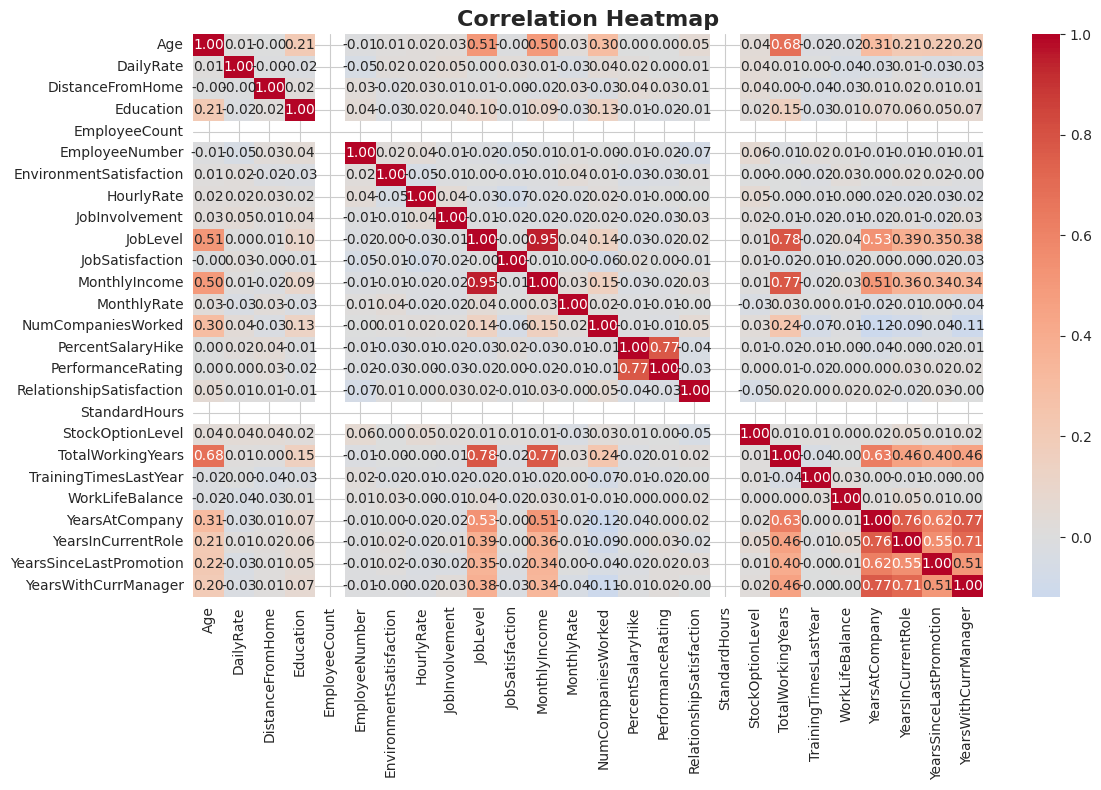

In [6]:
# 4.3: Numerical features correlation with Attrition
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if len(numerical_cols) > 0:
    plt.figure(figsize=(12, 8))
    corr_matrix = df[numerical_cols].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
    plt.title('Correlation Heatmap', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

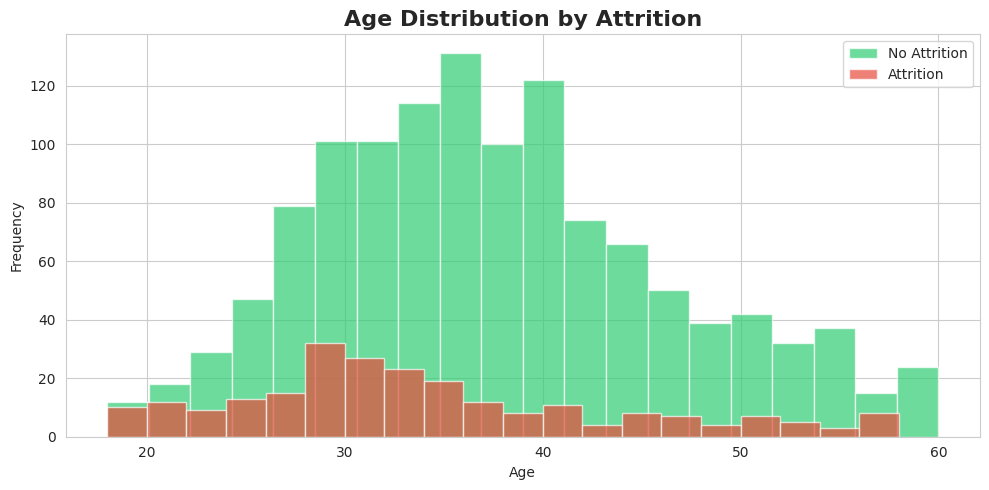

In [7]:
# 4.4: Age distribution by Attrition
if 'Age' in df.columns:
    plt.figure(figsize=(10, 5))
    df[df['Attrition']=='No']['Age'].hist(bins=20, alpha=0.7, label='No Attrition', color='#2ecc71')
    df[df['Attrition']=='Yes']['Age'].hist(bins=20, alpha=0.7, label='Attrition', color='#e74c3c')
    plt.title('Age Distribution by Attrition', fontsize=16, fontweight='bold')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.legend()
    plt.tight_layout()
    plt.show()


In [8]:
# Step 5: Data Preprocessing
print("\n" + "="*60)
print("DATA PREPROCESSING")
print("="*60)

# Make a copy
df_processed = df.copy()

# Encode target variable
df_processed['Attrition'] = df_processed['Attrition'].map({'Yes': 1, 'No': 0})

# Encode categorical variables
label_encoders = {}
categorical_cols = df_processed.select_dtypes(include=['object']).columns

for col in categorical_cols:
    le = LabelEncoder()
    df_processed[col] = le.fit_transform(df_processed[col])
    label_encoders[col] = le

print(f"\nEncoded {len(categorical_cols)} categorical columns")
print("Processed dataset shape:", df_processed.shape)



DATA PREPROCESSING

Encoded 8 categorical columns
Processed dataset shape: (1470, 35)


In [9]:
# Separate features and target
X = df_processed.drop('Attrition', axis=1)
y = df_processed['Attrition']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Target distribution:\n{y.value_counts()}")

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Features shape: (1470, 34)
Target shape: (1470,)
Target distribution:
Attrition
0    1233
1     237
Name: count, dtype: int64

Training set size: 1176
Testing set size: 294


In [10]:
# Random Forest Classifier
print("\n1. Training Random Forest Classifier...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)
rf_pred_proba = rf_model.predict_proba(X_test_scaled)[:, 1]


1. Training Random Forest Classifier...


In [11]:
print("2. Training Logistic Regression...")
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)
lr_pred_proba = lr_model.predict_proba(X_test_scaled)[:, 1]


2. Training Logistic Regression...


In [12]:
# Random Forest Results
print("\nRANDOM FOREST RESULTS:")
print("\nClassification Report:")
print(classification_report(y_test, rf_pred))
print(f"ROC-AUC Score: {roc_auc_score(y_test, rf_pred_proba):.4f}")



RANDOM FOREST RESULTS:

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.97      0.91       247
           1       0.38      0.11      0.17        47

    accuracy                           0.83       294
   macro avg       0.62      0.54      0.54       294
weighted avg       0.78      0.83      0.79       294

ROC-AUC Score: 0.7976


In [13]:
print("\n" + "-"*60)
print("\nLOGISTIC REGRESSION RESULTS:")
print("\nClassification Report:")
print(classification_report(y_test, lr_pred))
print(f"ROC-AUC Score: {roc_auc_score(y_test, lr_pred_proba):.4f}")


------------------------------------------------------------

LOGISTIC REGRESSION RESULTS:

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       247
           1       0.69      0.38      0.49        47

    accuracy                           0.87       294
   macro avg       0.79      0.68      0.71       294
weighted avg       0.86      0.87      0.86       294

ROC-AUC Score: 0.8048


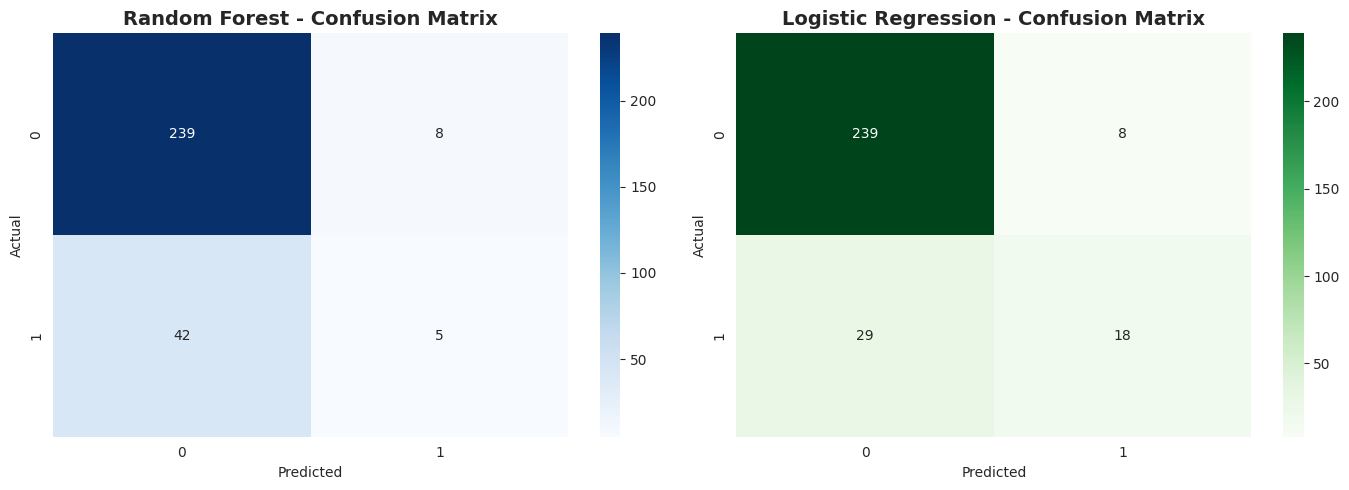

In [14]:
# 9.1: Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Random Forest
cm_rf = confusion_matrix(y_test, rf_pred)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Random Forest - Confusion Matrix', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Logistic Regression
cm_lr = confusion_matrix(y_test, lr_pred)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('Logistic Regression - Confusion Matrix', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

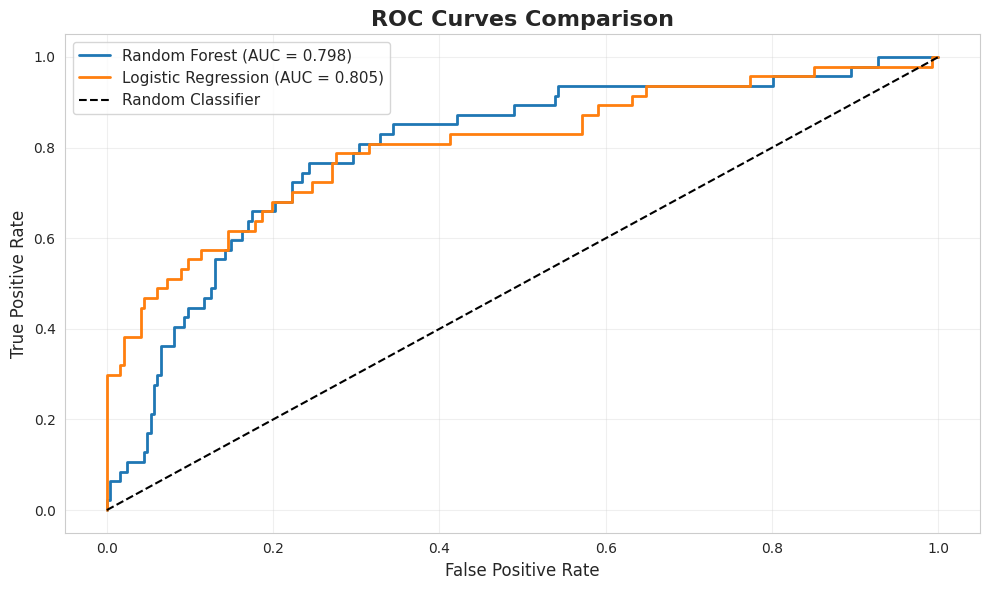

In [15]:
# 9.2: ROC Curves
plt.figure(figsize=(10, 6))

# Random Forest ROC
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_pred_proba)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_score(y_test, rf_pred_proba):.3f})', linewidth=2)

# Logistic Regression ROC
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_pred_proba)
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, lr_pred_proba):.3f})', linewidth=2)

# Diagonal line
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves Comparison', fontsize=16, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

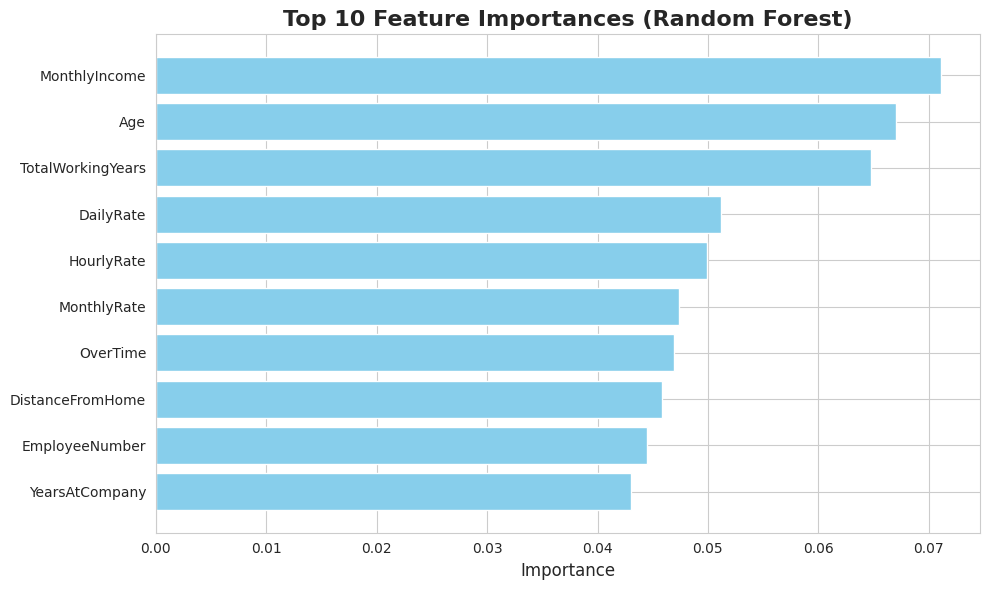

In [16]:
# 9.3: Feature Importance (Random Forest)
plt.figure(figsize=(10, 6))
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False).head(10)

plt.barh(range(len(feature_importance)), feature_importance['Importance'], color='skyblue')
plt.yticks(range(len(feature_importance)), feature_importance['Feature'])
plt.xlabel('Importance', fontsize=12)
plt.title('Top 10 Feature Importances (Random Forest)', fontsize=16, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [17]:
print("\n" + "="*60)
print("PROJECT SUMMARY")
print("="*60)

print(f"""
Key Findings:
1. Dataset contains {len(df)} employee records
2. Overall attrition rate: {(y.sum() / len(y) * 100):.2f}%
3. Random Forest achieved ROC-AUC: {roc_auc_score(y_test, rf_pred_proba):.4f}
4. Logistic Regression achieved ROC-AUC: {roc_auc_score(y_test, lr_pred_proba):.4f}

Top 3 Most Important Features:
{feature_importance.head(3).to_string(index=False)}

Recommendations:
- Focus retention efforts on employees with high attrition probability
- Monitor key factors identified in feature importance analysis
- Implement regular satisfaction surveys
- Review compensation and work-life balance policies
""")


PROJECT SUMMARY

Key Findings:
1. Dataset contains 1470 employee records
2. Overall attrition rate: 16.12%
3. Random Forest achieved ROC-AUC: 0.7976
4. Logistic Regression achieved ROC-AUC: 0.8048

Top 3 Most Important Features:
          Feature  Importance
    MonthlyIncome    0.071086
              Age    0.066994
TotalWorkingYears    0.064751

Recommendations:
- Focus retention efforts on employees with high attrition probability
- Monitor key factors identified in feature importance analysis
- Implement regular satisfaction surveys
- Review compensation and work-life balance policies

